làm sạch dữ liệu

In [1]:
import pandas as pd
import datetime as dt
import numpy as np

df = pd.read_excel("mba.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Đổi kiểu bảng thành danh sách sản phầm theo hóa đơn

In [2]:
# Đếm tần suất xuất hiện của mỗi sản phẩm
product_counts = df["Description"].value_counts()

# Lấy 30 sản phẩm xuất hiện nhiều nhất
top_products = product_counts.head(30).index

# Lọc dữ liệu, chỉ giữ lại các sản phẩm trong danh sách 30 sản phẩm phổ biến
filtered_data = df[df["Description"].isin(top_products)]

# Nhóm lại dữ liệu theo InvoiceNo và gộp các sản phẩm
grouped_data = filtered_data.groupby("InvoiceNo")["Description"].apply(list).reset_index()

# Tìm số lượng sản phẩm tối đa trong một hóa đơn sau khi lọc
max_items = grouped_data["Description"].apply(len).max()

# Chuyển dữ liệu hóa đơn thành DataFrame với mỗi sản phẩm là một cột
transformed_data = pd.DataFrame(grouped_data["Description"].tolist(), columns=[f"Item_{i+1}" for i in range(max_items)],index=grouped_data["InvoiceNo"])

# Thay thế các giá trị None bằng NaN
transformed_data = transformed_data.replace([None], np.nan)

# Kết quả
print(f"Số lượng sản phẩm lớn nhất trong một hóa đơn sau khi lọc: {max_items}")
print(transformed_data.head(5))
print(transformed_data.shape)



Số lượng sản phẩm lớn nhất trong một hóa đơn sau khi lọc: 28
                                       Item_1   Item_2 Item_3 Item_4 Item_5  \
InvoiceNo                                                                     
536365     WHITE HANGING HEART T-LIGHT HOLDER      NaN    NaN    NaN    NaN   
536367          ASSORTED COLOUR BIRD ORNAMENT      NaN    NaN    NaN    NaN   
536368               JAM MAKING SET WITH JARS      NaN    NaN    NaN    NaN   
536370              ALARM CLOCK BAKELIKE RED   POSTAGE    NaN    NaN    NaN   
536371        PAPER CHAIN KIT 50'S CHRISTMAS       NaN    NaN    NaN    NaN   

          Item_6 Item_7 Item_8 Item_9 Item_10  ... Item_19 Item_20 Item_21  \
InvoiceNo                                      ...                           
536365       NaN    NaN    NaN    NaN     NaN  ...     NaN     NaN     NaN   
536367       NaN    NaN    NaN    NaN     NaN  ...     NaN     NaN     NaN   
536368       NaN    NaN    NaN    NaN     NaN  ...     NaN     NaN     Na

Dữ liệu sau khi làm sạch

In [3]:
filtered_transactions = transformed_data[transformed_data.notna().sum(axis=1) >= 2]
print(f"số hóa đơn: {filtered_transactions.shape[0]}")
filtered_transactions.head()

số hóa đơn: 8193


,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,...,Item_19,Item_20,Item_21,Item_22,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,ALARM CLOCK BAKELIKE RED,POSTAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536373,WHITE HANGING HEART T-LIGHT HOLDER,WOODEN PICTURE FRAME WHITE FINISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536375,WHITE HANGING HEART T-LIGHT HOLDER,WOODEN PICTURE FRAME WHITE FINISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536378,JUMBO BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT,PACK OF 72 RETROSPOT CAKE CASES,JUMBO STORAGE BAG SUKI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536381,JUMBO SHOPPER VINTAGE RED PAISLEY,PAPER CHAIN KIT 50'S CHRISTMAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Thông tin chung về mỗi sản phẩm

In [15]:
# Tạo bảng với các sản phẩm, số lần xuất hiện và tỷ lệ phần trăm
description_counts = transformed_data.apply(pd.Series.value_counts).sum(axis=1).dropna()

# Tính tổng số hóa đơn
total_invoices = transformed_data.shape[0]

# Tạo DataFrame với các cột yêu cầu
summary_table = pd.DataFrame({
    'Description': description_counts.index,   # Tên sản phẩm
    'count': description_counts.values,       # Số lần xuất hiện
    'item_perc': (description_counts.values / total_invoices) * 100  # Tỷ lệ phần trăm
})

# Reset index để Description thành cột
summary_table = summary_table.reset_index(drop=True)

# Sắp xếp bảng theo số lượng sản phẩm giảm dần
summary_table = summary_table.sort_values(by='count', ascending=False)

# In kết quả
print(f"Items count:{total_invoices}")
summary_table.rename(columns={"Description":"item_name"},inplace=True)
summary_table = summary_table.reset_index(drop=True)
summary_table.head(10)



Items count:13362


,item_name,count,item_perc
0,WHITE HANGING HEART T-LIGHT HOLDER,2369.0,17.729382
1,REGENCY CAKESTAND 3 TIER,2200.0,16.464601
2,JUMBO BAG RED RETROSPOT,2159.0,16.157761
3,PARTY BUNTING,1727.0,12.924712
4,LUNCH BAG RED RETROSPOT,1638.0,12.258644
5,ASSORTED COLOUR BIRD ORNAMENT,1501.0,11.233348
6,SET OF 3 CAKE TINS PANTRY DESIGN,1473.0,11.023799
7,PACK OF 72 RETROSPOT CAKE CASES,1385.0,10.365215
8,LUNCH BAG BLACK SKULL.,1350.0,10.103278
9,NATURAL SLATE HEART CHALKBOARD,1280.0,9.579404


Biểu đồ

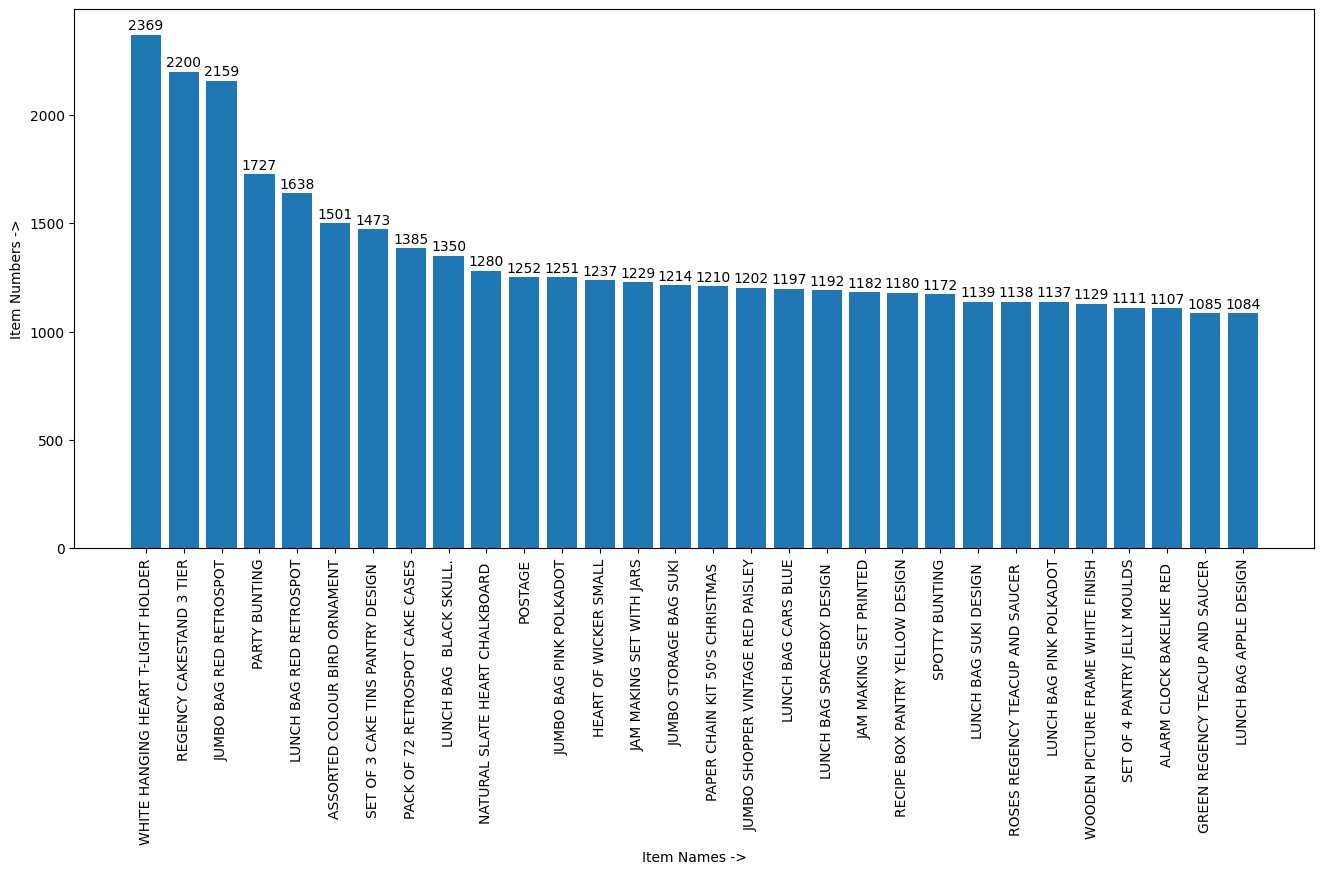

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=[16,7])
bars=plt.bar(summary_table["item_name"],summary_table["count"])
plt.ylabel("Item Numbers ->")
plt.xlabel("Item Names ->")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation = 90,fontsize=10)
plt.show()

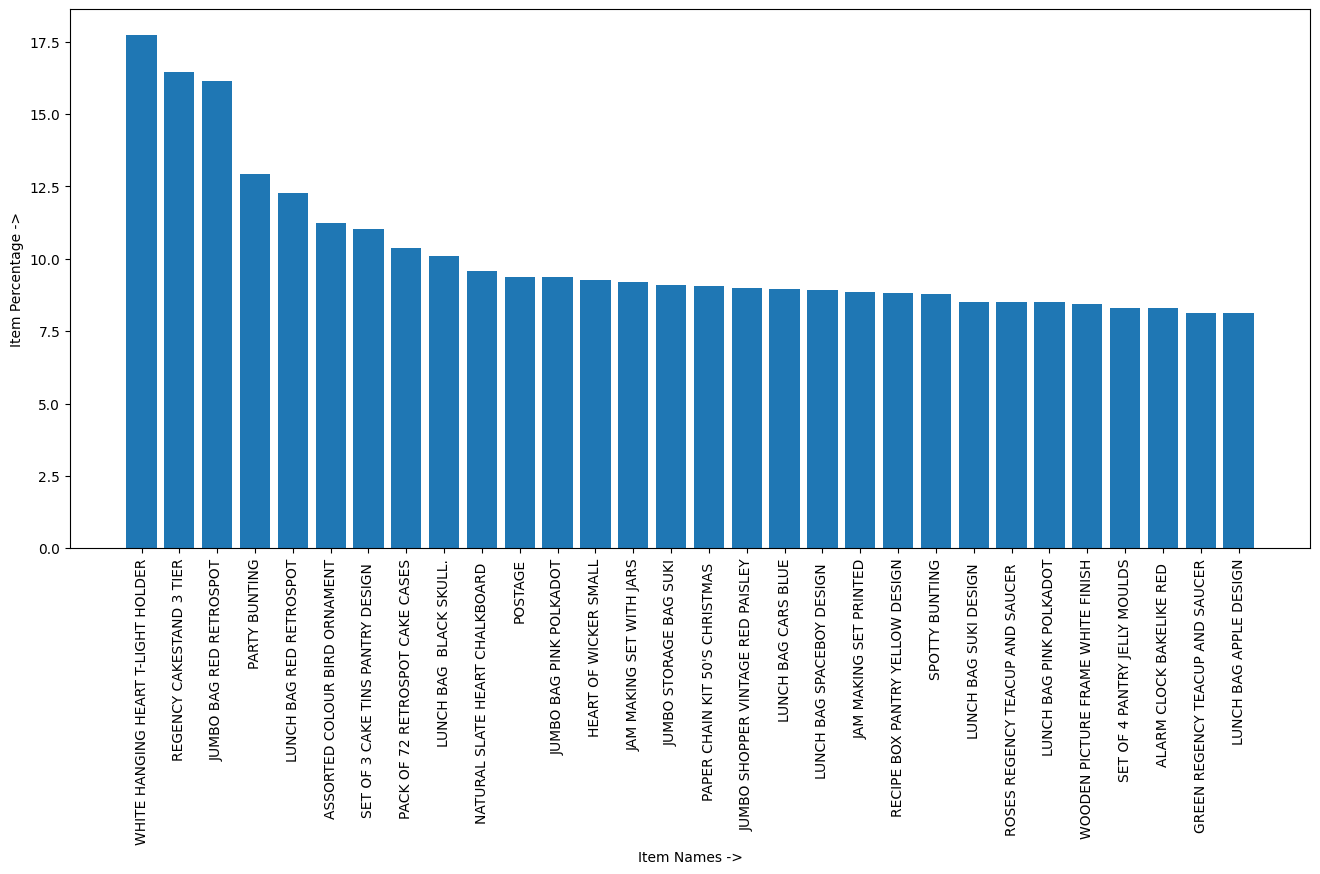

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=[16,7])
plt.bar(summary_table["item_name"],summary_table["item_perc"])
plt.ylabel("Item Percentage ->")
plt.xlabel("Item Names ->")

plt.xticks(rotation = 90,fontsize=10)
plt.show()

Xử lí Association Rules:
1. Tạo records để làm tham số cho hàm aptioriaptiori

In [6]:
records = []
row = filtered_transactions.shape[0]
col = filtered_transactions.shape[1]
for i in range(0,row):
    records.append([str(filtered_transactions.values[i,j]) for j in range(0, col)])

tạo association rules

In [7]:
from apyori import apriori
# Tính frequent itemsets
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)


Market Basket Analysis

In [8]:
results = []
for item in association_results:
    pair = item[0]
    items = [x for x in pair]
    
    consequent = str(items[0])
    antecedent = str(items[1])
    support = int(float(str(item[1])[:7]) * 100000)
    confidence = str(item[2][0][2])[:7]
    lift = str(item[2][0][3])[:7]
    
    rows = (consequent,antecedent,support,confidence,lift)
    results.append(rows)
    
    final_result = pd.DataFrame(results,columns=['Consequent','Anticedent','Support','Confidence','Lift'])

In [9]:
final_result = final_result.sort_values("Support",ascending=False,ignore_index=True)
final_result = final_result[(final_result["Consequent"] != 'nan') & (final_result["Anticedent"] != 'nan')].sort_values("Support",ignore_index=True,ascending=False)
final_result
# for i in range(final_result.shape[0]):
#     print(f"Seems like people who are buying {final_result.Anticedent[i:i+1].values[0]} are more likely to buy {final_result.Consequent[i:i+1].values[0]}.")

,Consequent,Anticedent,Support,Confidence,Lift
0,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,10167,0.72309,3.06481
1,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,9569,0.77855,6.01193
2,LUNCH BAG BLACK SKULL.,LUNCH BAG PINK POLKADOT,6676,0.44291,3.35069
3,LUNCH BAG CARS BLUE,LUNCH BAG BLACK SKULL.,6419,0.42591,3.11283
4,JUMBO STORAGE BAG SUKI,JUMBO SHOPPER VINTAGE RED PAISLEY,6407,0.46833,3.34528
...,...,...,...,...,...
9979,GREEN REGENCY TEACUP AND SAUCER,WHITE HANGING HEART T-LIGHT HOLDER,451,0.30081,18.2560
9980,GREEN REGENCY TEACUP AND SAUCER,WHITE HANGING HEART T-LIGHT HOLDER,451,0.30081,23.6977
9981,JAM MAKING SET WITH JARS,PACK OF 72 RETROSPOT CAKE CASES,451,0.22023,18.6021
9982,LUNCH BAG SUKI DESIGN,ROSES REGENCY TEACUP AND SAUCER,451,0.33035,4.60308
